# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity
- Fractal dimension measures

Note that while entropy measures can be considered as mesaured of complexity, they are considered in a separate notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed
from neurodsp.aperiodic.conversions import convert_exponent_hfd

from antropy import hjorth_params
from antropy import lziv_complexity
from antropy import higuchi_fd, petrosian_fd, katz_fd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.wrappers import (hjorth_activity_wrapper, hjorth_mobility_wrapper,
                          hjorth_complexity_wrapper, lempelziv_wrapper)
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Notebooks
SAVE_FIG = False

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [5]:
# Check the calculated Hjorth activity values across some example signals
print('Computed Hjorth activity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_activity_wrapper(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_activity_wrapper(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_activity_wrapper(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_activity_wrapper(SIG_KN)))

Computed Hjorth activity:
  powerlaw: 	 1.0000
  osc:      	 1.0000
  combined: 	 1.0000
  knee:     	 1.0000


In [6]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility_wrapper(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.1387
  osc:      	 0.0628
  combined: 	 0.2509
  knee:     	 0.4321


In [7]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity_wrapper(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 10.5724
  osc:      	 1.0001
  combined: 	 5.8325
  knee:     	 3.3605


### Hjorth Parameters: Aperiodic Variations

In [8]:
# Run a set of simulations, calculating Hjorth measures across exponents
hjm_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility_wrapper, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

hjc_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity_wrapper, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

In [9]:
# Run a set of simulations, calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

hjc_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

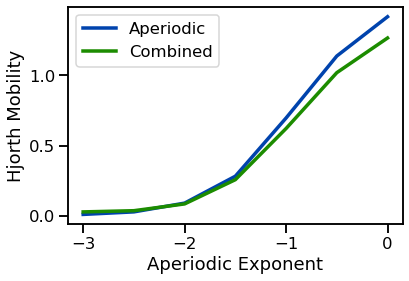

In [10]:
# Plot Hjorth mobility across exponents
plot_lines(EXPS, hjm_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hjm_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Mobility')
plot_lines(save_fig=SAVE_FIG, file_name='hjm_both', file_path='complexity')

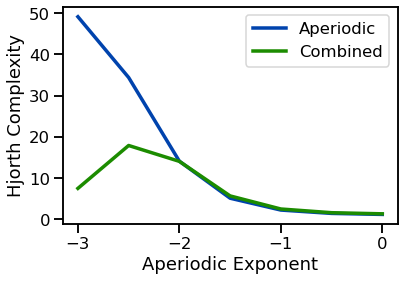

In [11]:
# Plot Hjorth complexity across exponents with an oscillation present
plot_lines(EXPS, hjc_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hjc_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='hjc_both', file_path='complexity')

### Hjorth Parameters: Periodic Variations

In [12]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hjm_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

hjc_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

In [13]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hjm_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                        update='update_pow', values=POWERS, n_sims=N_SIMS)

hjc_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                        update='update_pow', values=POWERS, n_sims=N_SIMS)

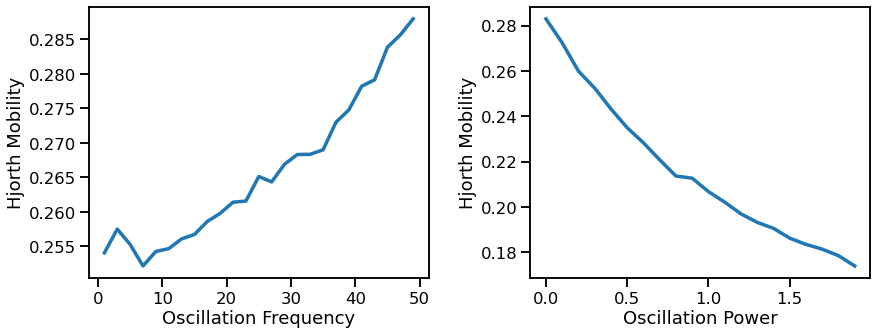

In [14]:
# Plot effect of oscillation variation on Hjorth mobility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Mobility', ax=axes[0])
plot_lines(POWERS, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Mobility', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjm_osc_both', file_path='complexity')

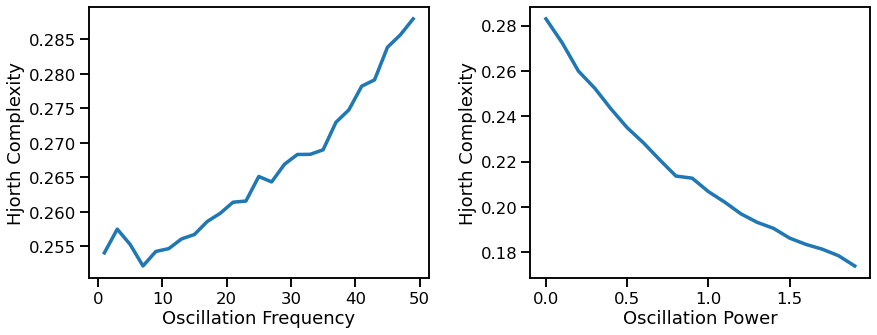

In [15]:
# Plot effect of oscillation variation on Hjorth complexity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Complexity', ax=axes[0])
plot_lines(POWERS, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Complexity', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjc_osc_both', file_path='complexity')

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [16]:
# Define settings for computing Lempel-Ziv complexity
lz_params = {'normalize' : False}

In [17]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(SIG_AP > np.median(SIG_AP)).astype(int)
lziv_complexity(bin_sig)

441

### Calculating Lempel-Ziv Complexity on Example Signals

In [18]:
# Check Lempel-Ziv complexity measures on example signals
print('Lempel-Ziv complexity:')
print('  powerlaw: \t {:5d}'.format(lempelziv_wrapper(SIG_AP, **lz_params)))
print('  osc:      \t {:5d}'.format(lempelziv_wrapper(SIG_OSC, **lz_params)))
print('  combined: \t {:5d}'.format(lempelziv_wrapper(SIG_COMB, **lz_params)))
print('  knee:     \t {:5d}'.format(lempelziv_wrapper(SIG_KN, **lz_params)))

Lempel-Ziv complexity:
  powerlaw: 	   441
  osc:      	     5
  combined: 	   693
  knee:     	  1113


### Aperiodic Variations

In [19]:
# Run a set of simulations, calculating LZ complexity across exponents
lz_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, lempelziv_wrapper, lz_params,
                       update='update_exp', values=EXPS, n_sims=N_SIMS)

# Run a set of simulations, calculating LZ complexity across exponents with an oscillation
lz_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, lempelziv_wrapper, lz_params,
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

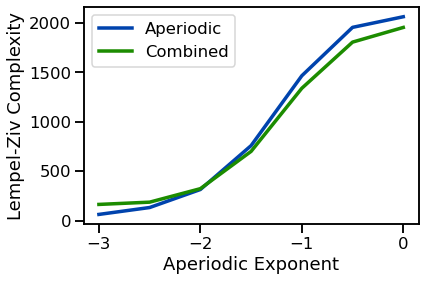

In [20]:
# Plot LZ complexity measures
plot_lines(EXPS, lz_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, lz_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Lempel-Ziv Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='lz_both', file_path='complexity')

### Periodic Variations

In [21]:
# Run a set of simulations, calculating LZ complexity across oscillation frequency
lz_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, lempelziv_wrapper, lz_params,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

In [22]:
# Run a set of simulations, calculating fractal dimension across oscillation power
lz_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, lempelziv_wrapper, lz_params,
                       update='update_pow', values=POWERS, n_sims=N_SIMS)

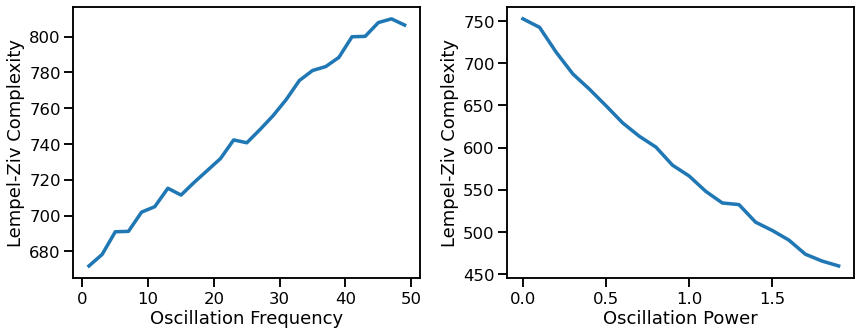

In [23]:
# Plot effect of oscillation variation on LZ complexity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, lz_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Lempel-Ziv Complexity', ax=axes[0])
plot_lines(POWERS, lz_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Lempel-Ziv Complexity', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='lz_osc_both', file_path='complexity')

## Fractal Dimensions

Calculate measures of fractal dimension on time series. 

Fractal dimension measures:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

### Calculating Fractal Dimension on Example Signals

In [24]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exponent_hfd(-EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

Higuchi fractal dimension:
  powerlaw: 	 1.6565 	 1.75
  osc:      	 1.0069
  combined: 	 1.6006
  knee:     	 1.5885


In [25]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

Katz fractal dimension:
  powerlaw: 	 3.1174
  osc:      	 3.2026
  combined: 	 3.4519
  knee:     	 4.0122


In [26]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

Petrosian fractal dimension:
  powerlaw: 	 1.0188
  osc:      	 1.0008
  combined: 	 1.0187
  knee:     	 1.0186


### Fracal Dimension: Aperiodic Variations

In [27]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

kfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, katz_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

pfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

In [28]:
# Run a set of simulations, calculating fractal dimension across exponents with an oscillation
hfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

kfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

pfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

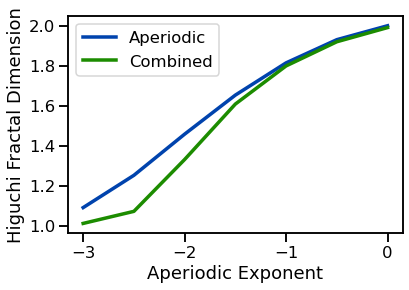

In [29]:
# Plot Higuchi fractal dimension measures
plot_lines(EXPS, hfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Higuchi Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='hfd_both', file_path='complexity')

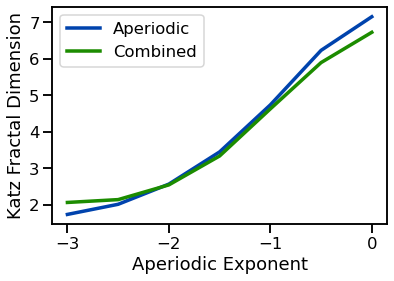

In [30]:
# Plot Katz fractal dimension measures
plot_lines(EXPS, kfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, kfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Katz Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='kfd_both', file_path='complexity')

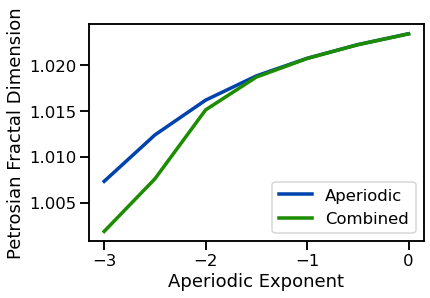

In [31]:
# Plot Petrosian fractal dimension measures
plot_lines(EXPS, pfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, pfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Petrosian Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='pfd_both', file_path='complexity')

### Fractal Dimension: Periodic Variations

In [32]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

kfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

pfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

In [33]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                        update='update_pow', values=POWERS, n_sims=N_SIMS)

kfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                        update='update_pow', values=POWERS, n_sims=N_SIMS)

pfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                        update='update_pow', values=POWERS, n_sims=N_SIMS)

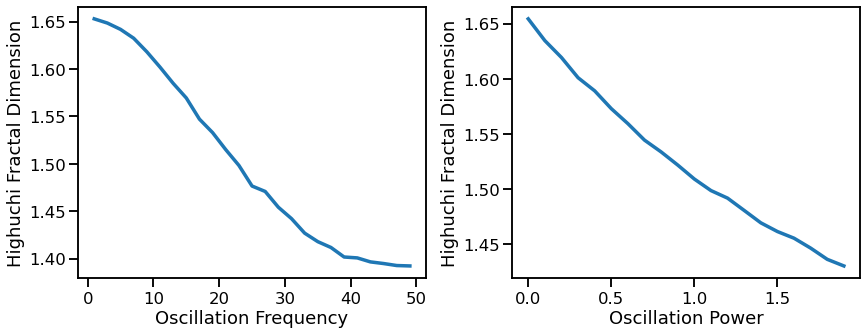

In [34]:
# Plot effect of oscillation variation on Higuchi fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Highuchi Fractal Dimension', ax=axes[0])
plot_lines(POWERS, hfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Highuchi Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='hfd_osc_both', file_path='complexity')

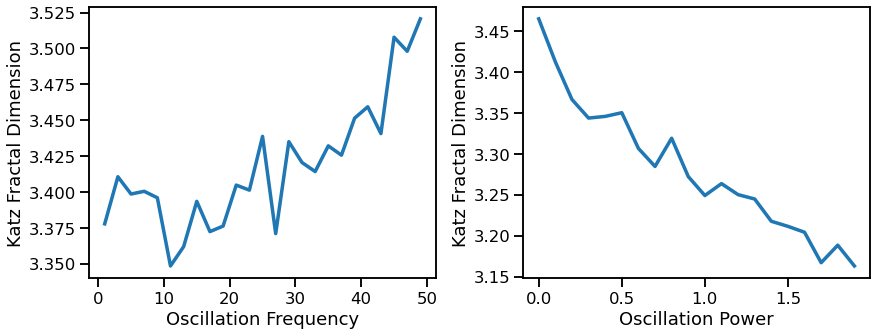

In [35]:
# Plot effect of oscillation variation on Katz fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, kfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Katz Fractal Dimension', ax=axes[0])
plot_lines(POWERS, kfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Katz Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='kfd_osc_both', file_path='complexity')

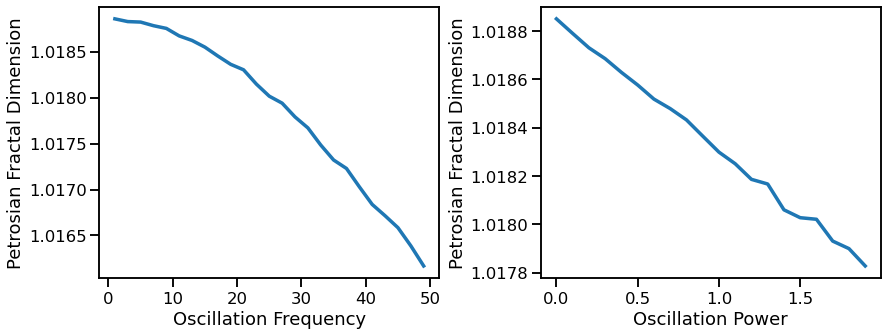

In [36]:
# Plot effect of oscillation variation on Petrosian fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, pfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Petrosian Fractal Dimension', ax=axes[0])
plot_lines(POWERS, pfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Petrosian Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='pfd_osc_both', file_path='complexity')